In [129]:
%pip install - -user snowflake-connector-python


Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


In [130]:
from dotenv import load_dotenv 
import os
import pymongo
import snowflake.connector
import pandas as pd
load_dotenv()

True

In [131]:
conn = snowflake.connector.connect(
    user=os.environ["SNOWFLAKE_USER"],
    password=os.environ["SNOWFLAKE_PASSWORD"],
    account=os.environ["SNOWFLAKE_ACCOUNT"],
    warehouse=os.environ["SNOWFLAKE_WAREHOUSE"],
    database=os.environ["SNOWFLAKE_DATABASE"],
    schema=os.environ["SNOWFLAKE_SCHEMA"],
    role=os.environ["SNOWFLAKE_ROLE"]
)

# Create a cursor object

cur = conn.cursor()

# Execute a query to select data from the table

cur.execute(f'SELECT * FROM FINALPROJECTDW.TIMESHEET_STAGING_STAGING.STG_TIMESHEET_FINAL')

# Fetch the results
rows = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()

# Convert the result into a pandas DataFrame for easier manipulation
df = pd.DataFrame(rows, columns=[x[0] for x in cur.description])


In [132]:
df = pd.DataFrame(rows, columns=[x[0] for x in cur.description])
df

,EMPID,PROJECTSELECTED,STARTDATE,ENDDATE,TASKSELECTED,COMMENTADDED,D0,D1,D2,D3,D4,D5,D6,ACTIVITYNAME
0,jman6188,Richards-Clark Initiative,25-12-2022,31-12-2022,Task C,,0,6,5,10,4,11,0,Sales Activity
1,jman6188,Richards-Clark Initiative,01-01-2023,07-01-2023,Task B,,2,9,5,0,11,4,6,BAU Activity
2,jman6188,Richards-Clark Initiative,08-01-2023,14-01-2023,Task D,Ready to dive in,8,6,7,0,3,0,0,BAU Activity
3,jman6188,Richards-Clark Initiative,15-01-2023,21-01-2023,Task D,,0,5,5,12,4,5,8,BAU Activity
4,jman6188,Richards-Clark Initiative,22-01-2023,28-01-2023,Task D,,10,0,12,4,6,5,3,BAU Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195929,jman6680,"Wolfe, Wilson and Shields Project",19-11-2023,25-11-2023,Task D,,10,6,10,5,0,0,0,BAU Activity
195930,jman6680,"Wolfe, Wilson and Shields Project",26-11-2023,02-12-2023,Task C,Hopeful for a successful outcome,2,0,0,8,0,6,0,BAU Activity
195931,jman6680,"Wolfe, Wilson and Shields Project",03-12-2023,09-12-2023,Task A,,0,0,0,4,5,4,1,BAU Activity
195932,jman6680,"Wolfe, Wilson and Shields Project",10-12-2023,16-12-2023,Task D,Excited to get started!,0,1,0,0,6,0,0,Sales Activity


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195934 entries, 0 to 195933
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   EMPID            195934 non-null  object
 1   PROJECTSELECTED  195934 non-null  object
 2   STARTDATE        195934 non-null  object
 3   ENDDATE          195934 non-null  object
 4   TASKSELECTED     195934 non-null  object
 5   COMMENTADDED     195934 non-null  object
 6   D0               195934 non-null  int64 
 7   D1               195934 non-null  int64 
 8   D2               195934 non-null  int64 
 9   D3               195934 non-null  int64 
 10  D4               195934 non-null  int64 
 11  D5               195934 non-null  int64 
 12  D6               195934 non-null  int64 
 13  ACTIVITYNAME     195934 non-null  object
dtypes: int64(7), object(7)
memory usage: 20.9+ MB


In [134]:
# %pip install matplotlib
# %pip install seaborn


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Visual Analysis

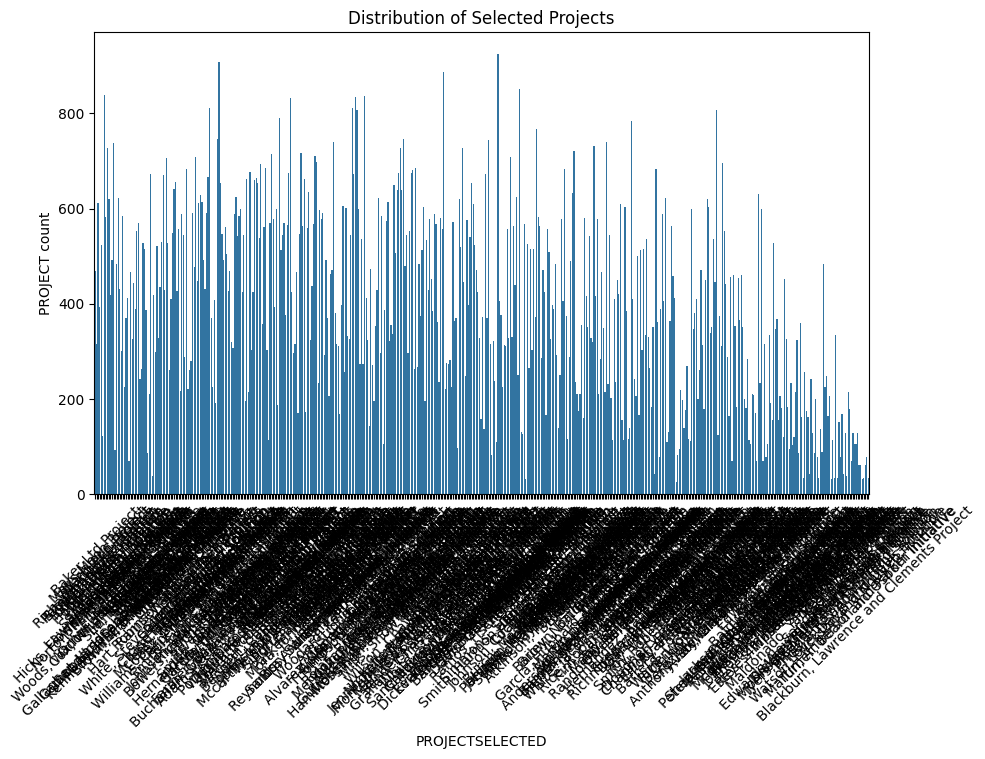

In [135]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PROJECTSELECTED')
plt.title('Distribution of Selected Projects')
plt.ylabel('PROJECT count')
plt.xticks(rotation=45)
plt.show()

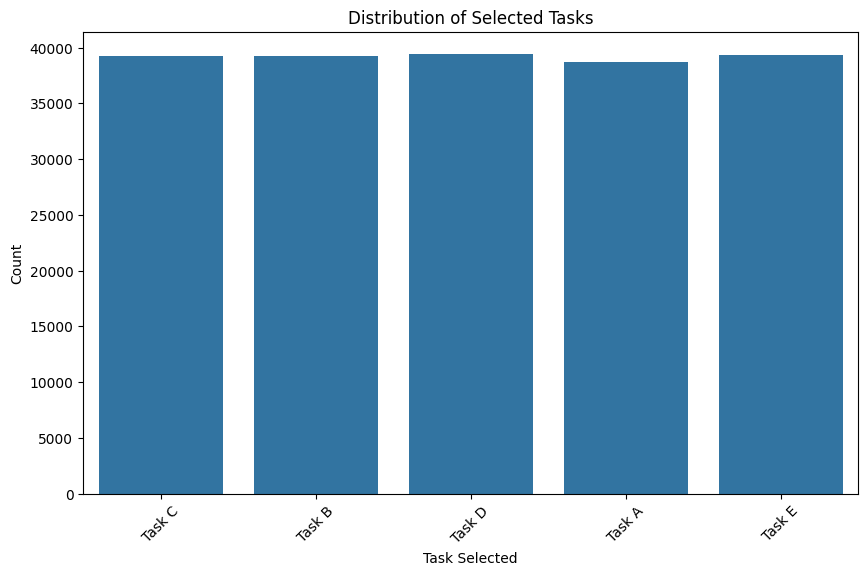

In [136]:
# Distribution of taskselected

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TASKSELECTED')
plt.title('Distribution of Selected Tasks')
plt.xlabel('Task Selected')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

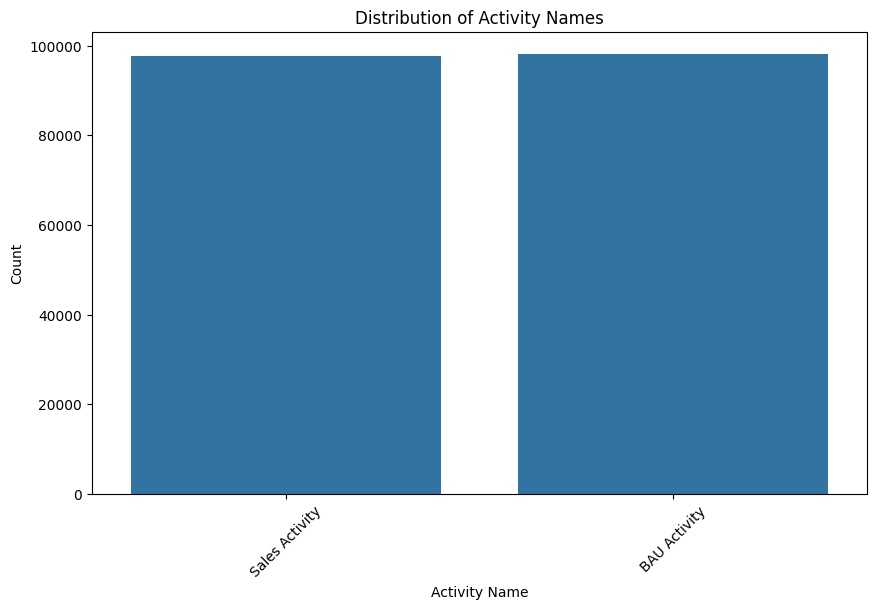

In [137]:
# Distribution of activityname


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ACTIVITYNAME')
plt.title('Distribution of Activity Names')
plt.xlabel('Activity Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [138]:
# Analysis of commentadded

comment_counts = df['COMMENTADDED'].value_counts()
print("Top 5 Comment Added:")
print(comment_counts.head())


Top 5 Comment Added:
COMMENTADDED
                                      97802
Ready to dive in                      12362
Eager to collaborate with the team    12360
Hopeful for a successful outcome      12324
Feeling motivated                     12289
Name: count, dtype: int64


In [139]:
# Analysis of total working hours per day

daily_hours = df[['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6']]
daily_hours_sum = daily_hours.sum(axis=1)
average_daily_hours = daily_hours_sum.mean()
print("Average total working hours per day:", average_daily_hours)


Average total working hours per day: 23.727331652495227


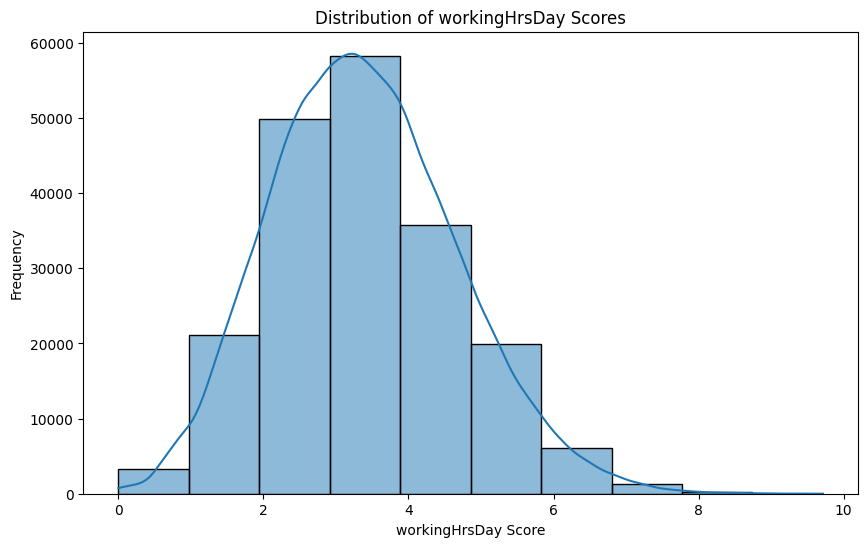

In [140]:
workingHrsDay_columns = ['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6']
df['workingHrsDay_SCORE'] = df[workingHrsDay_columns].mean(axis=1)

# Plot a histogram of qworking hours 
plt.figure(figsize=(10, 6))
sns.histplot(df['workingHrsDay_SCORE'], bins=10, kde=True)
plt.title('Distribution of workingHrsDay Scores')
plt.xlabel('workingHrsDay Score')
plt.ylabel('Frequency')
plt.show()

## Feature engineering and Model training


In [141]:
df['TOTAL_WEEKLY_HOURS'] = df[['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6']].sum(axis=1)

# Calculate average daily hours for each employee
df['AVG_DAILY_HOURS'] = df[['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6']].mean(axis=1)

# Mark attention needed based on thresholds
df['ATTENTION_WEEKLY'] = (df['TOTAL_WEEKLY_HOURS'] < 40).astype(int)
df['ATTENTION_DAILY'] = (df['AVG_DAILY_HOURS'] < 8).astype(int)

# Save the updated DataFrame to a new CSV file
df.to_csv('updated_timesheet.csv', index=False)

# Display the first few rows of the updated DataFrame
print(df.head())

      EMPID            PROJECTSELECTED   STARTDATE     ENDDATE TASKSELECTED   
0  jman6188  Richards-Clark Initiative  25-12-2022  31-12-2022       Task C  \
1  jman6188  Richards-Clark Initiative  01-01-2023  07-01-2023       Task B   
2  jman6188  Richards-Clark Initiative  08-01-2023  14-01-2023       Task D   
3  jman6188  Richards-Clark Initiative  15-01-2023  21-01-2023       Task D   
4  jman6188  Richards-Clark Initiative  22-01-2023  28-01-2023       Task D   

       COMMENTADDED  D0  D1  D2  D3  D4  D5  D6    ACTIVITYNAME   
0                     0   6   5  10   4  11   0  Sales Activity  \
1                     2   9   5   0  11   4   6    BAU Activity   
2  Ready to dive in   8   6   7   0   3   0   0    BAU Activity   
3                     0   5   5  12   4   5   8    BAU Activity   
4                    10   0  12   4   6   5   3    BAU Activity   

   workingHrsDay_SCORE  TOTAL_WEEKLY_HOURS  AVG_DAILY_HOURS  ATTENTION_WEEKLY   
0             5.142857                  3

In [142]:
attendance_status = df.groupby('EMPID').apply(
    lambda x: 1 if (x['ATTENTION_WEEKLY'].sum() == 1) and (x['ATTENTION_DAILY'].sum() == 1) else 0
)

# Display the attendance status for each employee
print("Attendance Status:")
print(attendance_status)



employees_with_improper_attendance = attendance_status[attendance_status == 1]

# Print the employees with proper attendance
print("Employees with proper attendance (Attendance Status = 1):")
print(employees_with_improper_attendance)

Attendance Status:
EMPID
jman1002    0
jman1004    0
jman1006    0
jman1007    0
jman1012    0
           ..
jman9989    0
jman9991    0
jman9993    0
jman9996    0
jman9997    0
Length: 3399, dtype: int64
Employees with proper attendance (Attendance Status = 1):
Series([], dtype: int64)


In [143]:
# %pip install imblearn

In [145]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your DataFrame containing the attendance data

# Perform undersampling to balance the classes
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(df[['TOTAL_WEEKLY_HOURS', 'AVG_DAILY_HOURS']], df['ATTENTION_WEEKLY'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1906
           1       1.00      1.00      1.00      1841

    accuracy                           1.00      3747
   macro avg       1.00      1.00      1.00      3747
weighted avg       1.00      1.00      1.00      3747



In [146]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your DataFrame containing the attendance data

# Separate features (X) and target variable (y)
X = df[['TOTAL_WEEKLY_HOURS', 'AVG_DAILY_HOURS']]
y = df['ATTENTION_WEEKLY']

# Perform oversampling to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37412
           1       1.00      1.00      1.00     37216

    accuracy                           1.00     74628
   macro avg       1.00      1.00      1.00     74628
weighted avg       1.00      1.00      1.00     74628



In [147]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your DataFrame containing the attendance data

# Separate features (X) and target variable (y)
X = df[['TOTAL_WEEKLY_HOURS', 'AVG_DAILY_HOURS']]
y = df['ATTENTION_WEEKLY']

# Perform oversampling to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37412
           1       1.00      1.00      1.00     37216

    accuracy                           1.00     74628
   macro avg       1.00      1.00      1.00     74628
weighted avg       1.00      1.00      1.00     74628



In [148]:
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Assuming df is your DataFrame containing the attendance data

# Separate features (X) and target variable (y)
X = df[['TOTAL_WEEKLY_HOURS', 'AVG_DAILY_HOURS']]
y = df['ATTENTION_WEEKLY']

# Perform oversampling to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(logreg, X_resampled, y_resampled, cv=5)
print("Cross-validation Scores:", cv_scores)

# Class distribution
print("Class Distribution:")
print(y_resampled.value_counts())

# Check if classes are balanced
print("Are classes balanced?")
print("Yes" if len(y_resampled.value_counts()) == 2 else "No")


Model Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37412
           1       1.00      1.00      1.00     37216

    accuracy                           1.00     74628
   macro avg       1.00      1.00      1.00     74628
weighted avg       1.00      1.00      1.00     74628

Confusion Matrix:
[[37412     0]
 [    0 37216]]
Cross-validation Scores: [1. 1. 1. 1. 1.]
Class Distribution:
ATTENTION_WEEKLY
1    186568
0    186568
Name: count, dtype: int64
Are classes balanced?
Yes


In [149]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Assuming df is your DataFrame containing the attendance data

# Separate features (X) and target variable (y)
X = df[['TOTAL_WEEKLY_HOURS', 'AVG_DAILY_HOURS']]
y = df['ATTENTION_WEEKLY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(logreg, X, y, cv=skf)
print("Cross-validation Scores:", cv_scores)

# Hyperparameter tuning using grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(logreg, param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X, y)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Model interpretation
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg.coef_[0]})
print("Logistic Regression Coefficients:")
print(coefficients)


Model Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1873
           1       1.00      1.00      1.00     37314

    accuracy                           1.00     39187
   macro avg       1.00      1.00      1.00     39187
weighted avg       1.00      1.00      1.00     39187

Confusion Matrix:
[[ 1873     0]
 [    0 37314]]
Cross-validation Scores: [1. 1. 1. 1. 1.]
Best Parameters: {'C': 0.001}
Best Cross-validation Accuracy: 1.0
Logistic Regression Coefficients:
              Feature  Coefficient
0  TOTAL_WEEKLY_HOURS    -9.838781
1     AVG_DAILY_HOURS    -1.405540


In [152]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming df is your DataFrame containing the attendance data

# Separate features (X) and target variable (y)
X = df[['TOTAL_WEEKLY_HOURS', 'AVG_DAILY_HOURS']]
y = df['ATTENTION_WEEKLY']

# Undersample the majority class
undersampler = RandomUnderSampler(sampling_strategy=0.2, random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# Oversample the minority class with a lower sampling strategy
smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X, y)

# Check the class distribution after resampling
print("Class Distribution after Undersampling:", pd.Series(y_undersampled).value_counts())
print("Class Distribution after Lower SMOTE Sampling Strategy:", pd.Series(y_oversampled).value_counts())


Class Distribution after Undersampling: ATTENTION_WEEKLY
1    46830
0     9366
Name: count, dtype: int64
Class Distribution after Lower SMOTE Sampling Strategy: ATTENTION_WEEKLY
1    186568
0     18656
Name: count, dtype: int64


In [153]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Assuming df is your DataFrame containing the attendance data

# Separate features (X) and target variable (y)
X = df[['TOTAL_WEEKLY_HOURS', 'AVG_DAILY_HOURS']]
y = df['ATTENTION_WEEKLY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversample the minority class
smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the models
logreg = LogisticRegression(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the models to the resampled training data
logreg.fit(X_train_resampled, y_train_resampled)
rf_classifier.fit(X_train_resampled, y_train_resampled)
svm_classifier.fit(X_train_resampled, y_train_resampled)
gb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
logreg_pred = logreg.predict(X_test)
rf_pred = rf_classifier.predict(X_test)
svm_pred = svm_classifier.predict(X_test)
gb_pred = gb_classifier.predict(X_test)

# Evaluate the models
models = {
    "Logistic Regression": logreg_pred,
    "Random Forest": rf_pred,
    "Support Vector Machine": svm_pred,
    "Gradient Boosting": gb_pred
}

for name, pred in models.items():
    print(f"Model: {name}")
    print("Accuracy Score:", accuracy_score(y_test, pred))
    print("Classification Report:")
    print(classification_report(y_test, pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, pred))
    print("-----------------------------------------------------")


Model: Logistic Regression
Accuracy Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1941
           1       1.00      1.00      1.00     37246

    accuracy                           1.00     39187
   macro avg       1.00      1.00      1.00     39187
weighted avg       1.00      1.00      1.00     39187

Confusion Matrix:
[[ 1941     0]
 [    0 37246]]
-----------------------------------------------------
Model: Random Forest
Accuracy Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1941
           1       1.00      1.00      1.00     37246

    accuracy                           1.00     39187
   macro avg       1.00      1.00      1.00     39187
weighted avg       1.00      1.00      1.00     39187

Confusion Matrix:
[[ 1941     0]
 [    0 37246]]
-----------------------------------------------------
Model:

In [ ]:
# # df.drop(['TASKSELECTED', 'ACTIVITYNAME'], axis=1, inplace=True)
# # df.dropna(subset=['ATTENTION'], inplace=True)
# # Create a new column 'TOTAL_HOURS' as the sum of 'D0' to 'D6'
# df['TOTAL_HOURS'] = df[['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6']].sum(axis=1)

# # Create a new column 'ATTENTION' based on 'TOTAL_HOURS'
# df['ATTENTION'] = pd.cut(df['TOTAL_HOURS'], bins=[0, 45, 55, float('inf')], labels=['low', 'good', 'high'])

# # Split data into features and target
# X = df.drop(['EMPID', 'PROJECTSELECTED', 'STARTDATE', 'ENDDATE', 'COMMENTADDED', 'TOTAL_HOURS', 'ATTENTION'], axis=1)
# y = df['ATTENTION']

In [ ]:
# # Check for null values
# null_values = df.isnull().sum()
# print("Null values in each column:")
# print(null_values)
# #

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Load the data
# # data = pd.read_csv('timesheet_final.csv')

# # Drop 'TASKSELECTED' and 'ACTIVITYNAME' columns
# # df.drop(['TASKSELECTED', 'ACTIVITYNAME'], axis=1, inplace=True)

# # # Create a new column 'TOTAL_HOURS' as the sum of 'D0' to 'D6'
# # df['TOTAL_HOURS'] = df[['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6']].sum(axis=1)

# # # Create a new column 'ATTENTION' based on 'TOTAL_HOURS'
# # df['ATTENTION'] = pd.cut(df['TOTAL_HOURS'], bins=[0, 45, 55, float('inf')], labels=['low', 'good', 'high'])

# # # Split data into features and target
# # X = df.drop(['EMPID', 'PROJECTSELECTED', 'STARTDATE', 'ENDDATE', 'COMMENTADDED', 'TOTAL_HOURS', 'ATTENTION'], axis=1)
# # y = df['ATTENTION']

# # Split data into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Train a Random Forest Classifier
# # clf = RandomForestClassifier(n_estimators=100, random_state=42)
# # clf.fit(X_train, y_train)

# # # Make predictions
# # y_pred = clf.predict(X_test)

# # # Evaluate the model
# # accuracy = accuracy_score(y_test, y_pred)
# # print("Accuracy:", accuracy)




In [ ]:
# # # Create a new column 'TOTAL_HOURS' as the sum of 'D0' to 'D6'
# df['TOTAL_HOURS'] = df[['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6']].sum(axis=1)




# # # Create a new column 'ATTENTION' based on 'TOTAL_HOURS'
# df['ATTENTION'] = pd.cut(df['TOTAL_HOURS'], bins=[0, 45, 55, float('inf')], labels=['low', 'good', 'high'])


# # Predict which projects need more attention based on higher working
# project_attention = df.groupby('PROJECTSELECTED')['TOTAL_HOURS'].sum().sort_values(ascending=False).head()
# print("Projects needing more attention based on higher working:\n", project_attention)


In [ ]:
# # Track individuals with consistently low attendance
# low_attendance = df.groupby('EMPID')['ATTENTION'].apply(lambda x: (x == 'low').sum())
# low_attendance = low_attendance[(low_attendance >= 2) & (df.groupby('EMPID')['TOTAL_HOURS'].sum() < 45)]
# print("Individuals with consistently low attendance and total hours less than 45:\n", low_attendance)


In [ ]:


# # import pandas as pd
# # from sklearn.model_selection import train_test_split
# # from sklearn.ensemble import RandomForestClassifier
# # from sklearn.metrics import accuracy_score

# # # Assuming df is your DataFrame with relevant features and 'ATTENTION' column indicating attendance

# # # Load your data
# # df = pd.read_csv('timesheet_final.csv')

# # Data Preprocessing
# # (You may need to perform additional preprocessing steps here)

# # Drop unnecessary columns
# df.drop(['EMPID', 'STARTDATE', 'ENDDATE'], axis=1, inplace=True)

# # Convert 'ATTENTION' column to numerical labels (if needed)
# df['ATTENTION'] = df['ATTENTION'].map({'low': 0, 'good': 1, 'high': 2})

# # Split data into features and target variable
# X = df.drop(['ATTENTION'], axis=1)
# y = df['ATTENTION']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Model Training
# # Train a Random Forest Classifier on the training data
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X_train, y_train)

# # Model Evaluation
# # Evaluate the performance of the trained model on the test set
# y_pred = clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Model Accuracy:", accuracy)

# # Prediction and Identification
# # Use the trained model to predict attendance for future data (if available)
# # Example:
# # future_attendance = clf.predict(future_data)

# # Identify individuals with consistently low attendance based on the predictions (if needed)
# # Example:
# # low_attendance_predicted = future_attendance[future_attendance == 'low']
# # print("Individuals with predicted low attendance:", low_attendance_predicted)


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# le_task = LabelEncoder()
# le_empid = LabelEncoder()

# df['TASKSELECTED'] = le_task.fit_transform(df['TASKSELECTED'])
# df['EMPID'] = le_empid.fit_transform(df['EMPID'])
# # Drop unnecessary columns
# # df.drop(['STARTDATE', 'ENDDATE'], axis=1, inplace=True)
# # Feature Engineering
# # Create a new column 'TOTAL_HOURS' as the sum of 'D0' to 'D6'
# df['TOTAL_HOURS'] = df[['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6']].sum(axis=1)

# # Create a new column 'ATTENTION' based on 'TOTAL_HOURS'
# df['ATTENTION'] = pd.cut(df['TOTAL_HOURS'], bins=[0, 45, 55, float('inf')], labels=['low', 'good', 'high'])

# # Predict which projects need more attention based on higher working
# project_attention = df.groupby('PROJECTSELECTED')['TOTAL_HOURS'].sum().sort_values(ascending=False).head()
# print("Projects needing more attention based on higher working:\n", project_attention)

# # Data Preprocessing
# # Convert 'ATTENTION' column to numerical labels
# df['ATTENTION'] = df['ATTENTION'].map({'low': 0, 'good': 1, 'high': 2})
# df.dropna(subset=['ATTENTION'], inplace=True)
# # Split data into features and target variable
# X = df.drop(['ATTENTION'], axis=1)
# y = df['ATTENTION']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Model Training
# # Train a Random Forest Classifier on the training data
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X_train, y_train)

# # Model Evaluation
# # Evaluate the performance of the trained model on the test set
# y_pred = clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Model Accuracy:", accuracy)



